In [2]:
#Lauren Todd-Mariano
#Ride sharing bubble plot homework
#9/22/2018

In [95]:
#import pandas, matplotlib, math, and OS
import pandas as pd
import matplotlib.pyplot as plt
import math
import os

In [96]:
#import data
city_data=pd.read_csv('05-Matplotlib_Homework_Instructions_Pyber_data_city_data.csv')
ride_data=pd.read_csv('05-Matplotlib_Homework_Instructions_Pyber_data_ride_data.csv')


In [97]:
#check city_data
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [98]:
#check ride date
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [108]:
#combine the data sets.  use left because we want data based on city
ride_city_combo = pd.merge(ride_data,city_data,how = "left", on=["city","city"])
ride_city_combo.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [109]:
#first need to group cities into their type and THEN perform the analysis for the bubble chart
urban_cities = ride_city_combo[ride_city_combo['type'] == "Urban"]
suburban_cities = ride_city_combo[ride_city_combo['type'] == "Suburban"]
rural_cities = ride_city_combo[ride_city_combo['type'] == "Rural"]

In [111]:
#find ride count, average fare, and driver count per city type
urban_ride_count = urban_cities.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban_cities.groupby(['city']).mean()["fare"]
urban_driver_count = urban_cities.groupby(["city"]).mean()["driver_count"]

suburban_ride_count = suburban_cities.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_cities.groupby(['city']).mean()["fare"]
suburban_driver_count = suburban_cities.groupby(["city"]).mean()["driver_count"]

rural_ride_count = rural_cities.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural_cities.groupby(['city']).mean()["fare"]
rural_driver_count = rural_cities.groupby(["city"]).mean()["driver_count"]

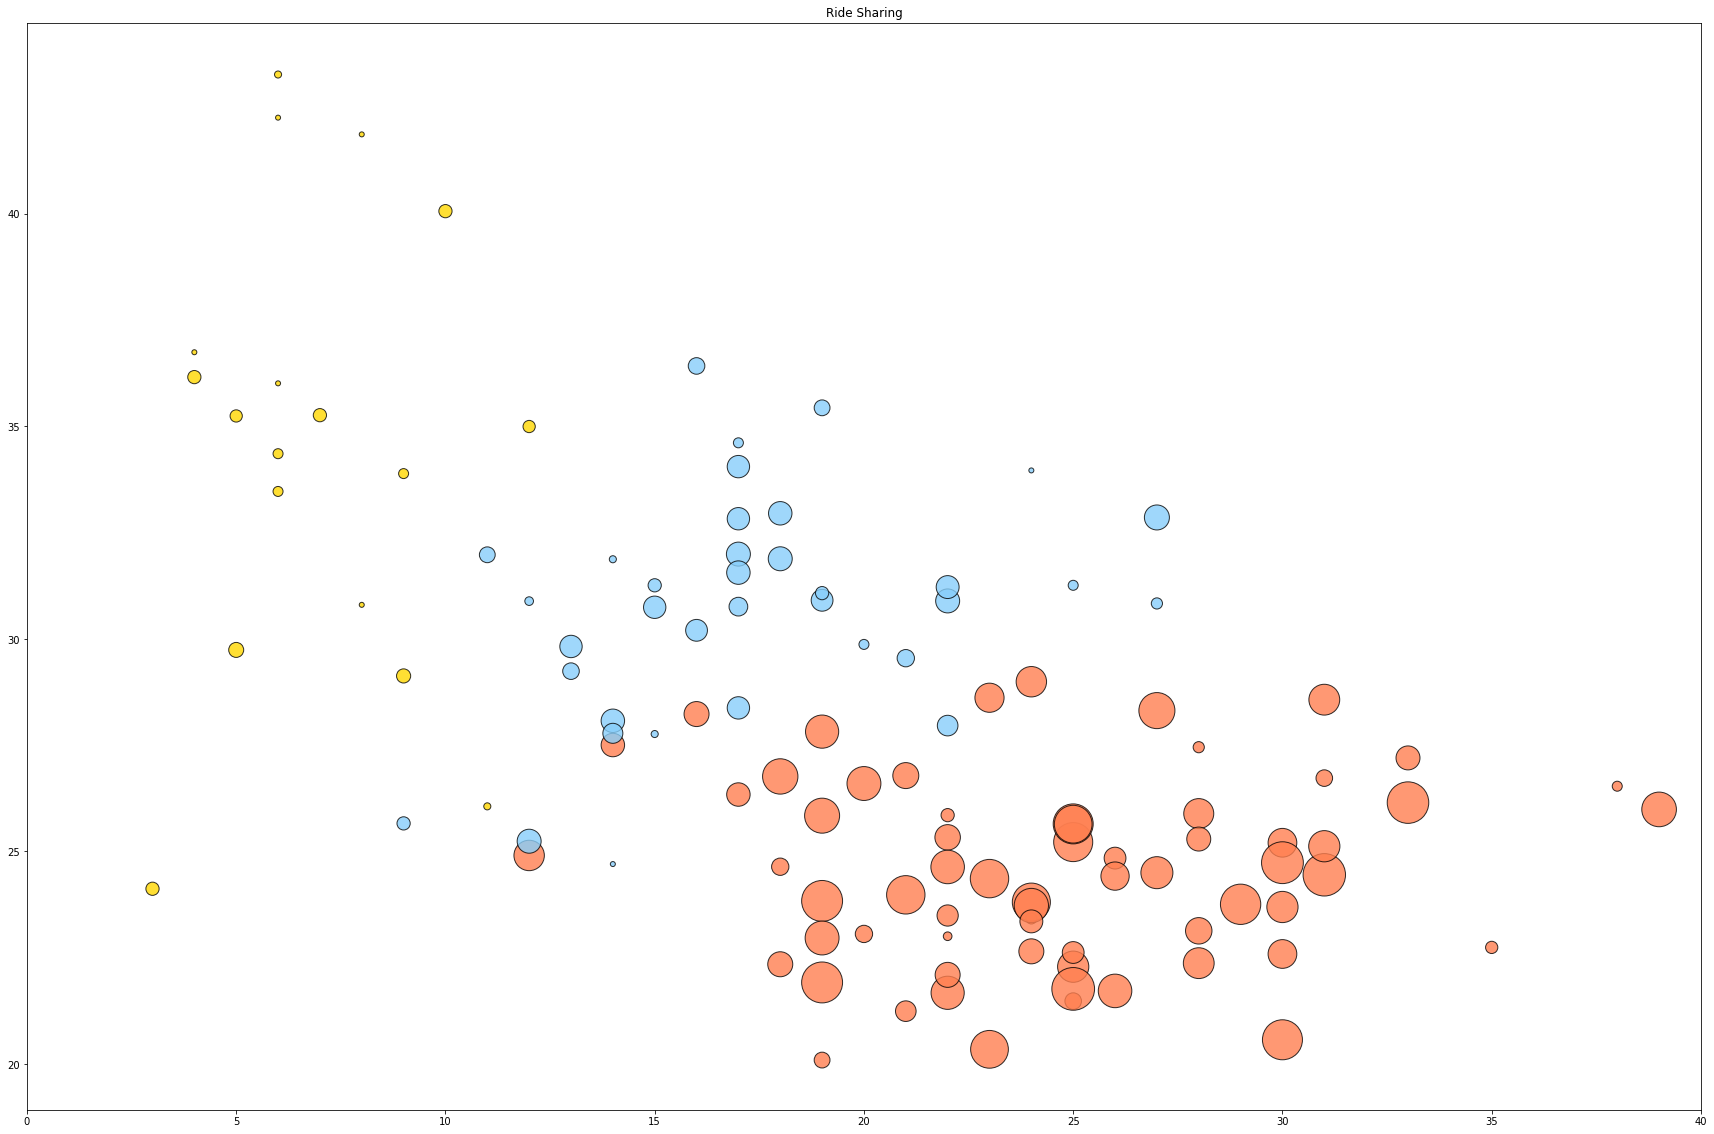

In [123]:
#make the scatter plot
plt.figure(figsize=(30, 20))
plt.scatter(x =urban_ride_count, y=urban_avg_fare, s= 25*urban_driver_count, c="coral", edgecolor="black", alpha=0.8)
plt.scatter(x =suburban_ride_count, y=suburban_avg_fare, s= 25*suburban_driver_count, c="lightskyblue", edgecolor="black", alpha=0.8)
plt.scatter(x =rural_ride_count, y=rural_avg_fare, s= 25*rural_driver_count, c="gold", edgecolor="black", alpha=0.8)
plt.xlim((0,40))
plt.title("Ride Sharing")
plt.show()

In [125]:
#observations
print ("Urban cities have most rides, lowest fares, and largest # of drivers.  Rural cities have fewest rides, highest fares, and fewest drivers.")

Urban cities have most rides, lowest fares, and largest # of drivers.  Rural cities have fewest rides, highest fares, and fewest drivers.


In [116]:
#prep the data for a pie chart, %fare urban/suburban/rural

total_fare = ride_city_combo['fare'].sum()
urban_fare = urban_cities['fare'].sum()
suburban_fare = suburban_cities['fare'].sum()
rural_fare = rural_cities['fare'].sum()

urban_percentage =urban_fare/total_fare*100
suburban_percentage=suburban_fare/total_fare*100
rural_percentage=rural_fare/total_fare*100

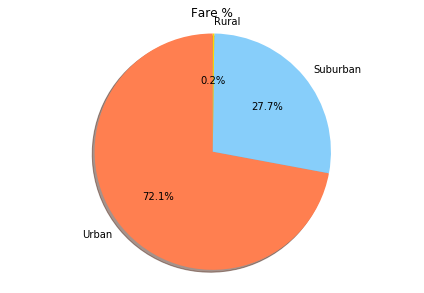

In [127]:
labels = ['Urban', 'Suburban', 'Rural']
sizes = [urban_percentage, suburban_percentage, rural_percentage]
colors = ['coral', 'lightskyblue', 'gold']
plt.pie(sizes, colors=colors, shadow=True, startangle=90, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()
plt.title("Fare %")
plt.show()

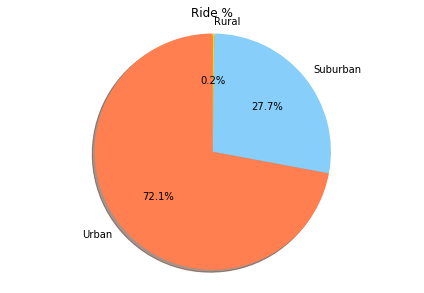

In [126]:
#prep data for pie chart, percent of riders by city type
total_rides = ride_city_combo['ride_id'].count()
urban_rides = urban_cities['ride_id'].count()
suburban_rides = suburban_cities['ride_id'].count()
rural_rides = rural_cities['ride_id'].count()


urban_percentage =urban_rides/total_rides*100
suburban_percentage=suburban_rides/total_rides*100
rural_percentage=rural_rides/total_fare*100

#make the pie chart
labels = ['Urban', 'Suburban', 'Rural']
sizes = [urban_percentage, suburban_percentage, rural_percentage]
colors = ['coral', 'lightskyblue', 'gold']
plt.pie(sizes, colors=colors, shadow=True, startangle=90, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()
plt.title("Ride %")
plt.show()

In [130]:
#observation
print ("Rides and fare % are equal. In a business scenario that would leave me to want to spot check the data and double check my query.  However, they both appear to be good here.  So, I am assuming that individual ride fares are equal across the board and do not vary based on location.  E.g the cost for a ride in an urban city is the same rate per mile as the cost for a ride in a rural area.")

Rides and fare % are equal. In a business scenario that would leave me to want to spot check the data and double check my query.  However, they both appear to be good here.  So, I am assuming that individual ride fares are equal across the board and do not vary based on location.  E.g the cost for a ride in an urban city is the same rate per mile as the cost for a ride in a rural area.


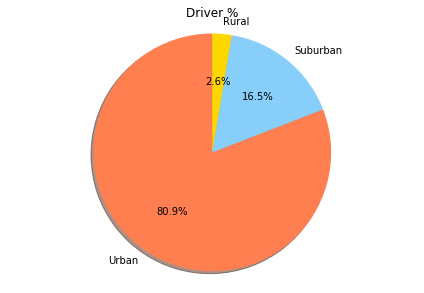

In [120]:
# % of Total Drivers by City Type
total_drivers = city_data['driver_count'].sum()
urban_drivers = city_data[city_data['type'] == "Urban"]['driver_count'].sum()
suburban_drivers = city_data[city_data['type'] == "Suburban"]['driver_count'].sum()
rural_drivers = city_data[city_data['type'] == "Rural"]['driver_count'].sum()


urban_percentage =urban_drivers/total_drivers*100
suburban_percentage=suburban_drivers/total_drivers*100
rural_percentage=rural_drivers/total_drivers*100

labels = ['Urban', 'Suburban', 'Rural']
sizes = [urban_percentage, suburban_percentage, rural_percentage]
colors = ['coral', 'lightskyblue', 'gold']
plt.pie(sizes, colors=colors, shadow=True, startangle=90, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()
plt.title("Driver %")
plt.show()

In [128]:
#observation
print ("Urban cities represent 80.9% of drivers but only 72% of fares and rides.  Perhaps urban drivers are doing so more frequently on a part-time basis.")

Urban cities represent 80.9% of drivers but only 72% of fares and rides.  Perhaps urban drivers are doing so more frequently on a part-time basis.
